# How to automatically select the varifold kernel?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import polpo.preprocessing.dict as ppdict
from polpo.mesh.surface import PvSurface
from polpo.mesh.varifold.tuning import SigmaBisecSearch
from polpo.preprocessing.load.pregnancy.jacobs import MeshLoader

[KeOps] Warning : CUDA was detected, but driver API could not be initialized. Switching to CPU only.


In [2]:
session_subset = np.random.choice(np.arange(1, 27))

mesh_loader = (
    MeshLoader(
        subject_subset=["01"],
        struct_subset=["L_Hipp"],
        session_subset=[session_subset],
        derivative="enigma",
        as_mesh=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + PvSurface
)

mesh = mesh_loader()

session_subset

np.int64(18)

In [3]:
ref_value = 0.1
grid_search = SigmaBisecSearch(
    ref_value=ref_value,
    decimator=True,
)

grid_search.fit([mesh])

grid_search.sigma_, grid_search.sdist_

(np.float64(3.212804326367738), np.float64(0.09214785741642118))

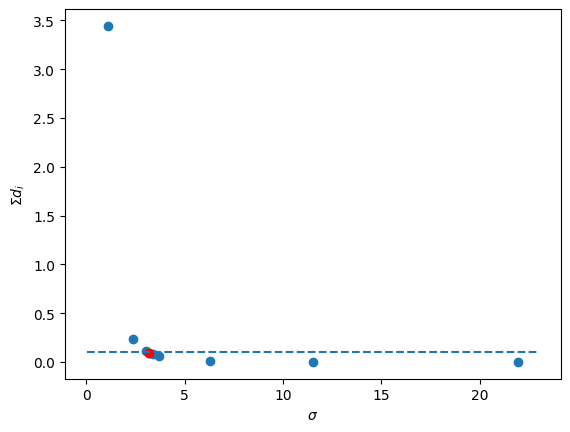

In [4]:
_, ax = plt.subplots()

ax.scatter(
    grid_search.grid_,
    grid_search.sdists_,
)
ax.scatter(grid_search.sigma_, grid_search.sdist_, color="red")
x_min, x_max = ax.get_xlim()
ax.hlines(y=ref_value, xmin=x_min, xmax=x_max, linestyle="--")

ax.set_xlabel(r"$\sigma$")
ax.set_ylabel(r"$\Sigma d_i$");